# **Time Series Homework 2**

Edward Anderson

**Honor Pledge**: On my honor as a student, I have neither given nor received any unauthorized aid on this assignment. - Edward Anderson

In [5]:
# Libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

## **QUESTION 1: Show a data description.**
1. Provide a summary of the data set to include descriptive statistics.
2. Plot the time series.
3. (optional) Provide any additional plots that may show important characteristics of your data

In [4]:
# Load Data
sales = pd.read_csv("data/sales_data.csv")
sales['date'] = pd.to_datetime(sales['date'], errors='coerce')
sales['qty'] = pd.to_numeric(sales['qty'], errors='coerce')
sales['val'] = pd.to_numeric(sales['val'], errors='coerce')
sales = (
    sales.drop(columns=['world'])
    .groupby('date').sum()
    .reset_index()
)
sales.head()

,date,qty,val
0,2018-01-02,690.0,617124.0
1,2018-01-03,342.0,234724.0
2,2018-01-04,378.0,191016.0
3,2018-01-05,210.0,116072.0
4,2018-01-08,396.0,280304.0


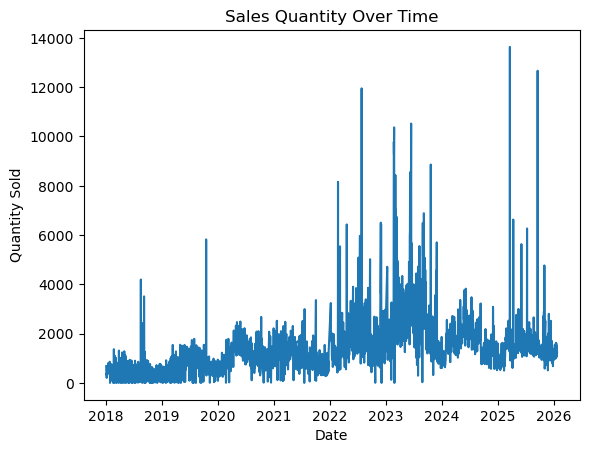

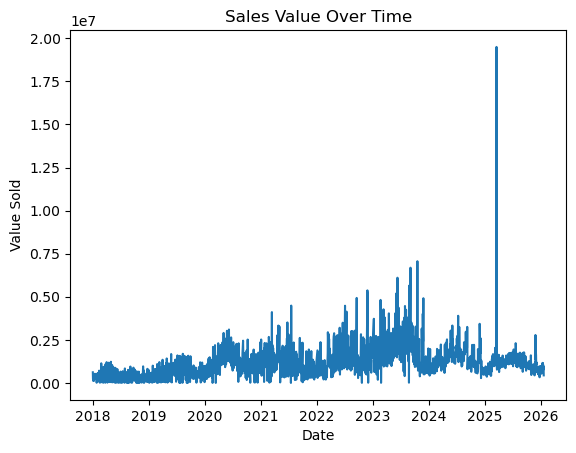

In [6]:
# Plot Sales Over Time
sns.lineplot(data=sales, x='date', y='qty')
plt.title('Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.show()

sns.lineplot(data=sales, x='date', y='val')
plt.title('Sales Value Over Time')
plt.xlabel('Date')
plt.ylabel('Value Sold')
plt.show()

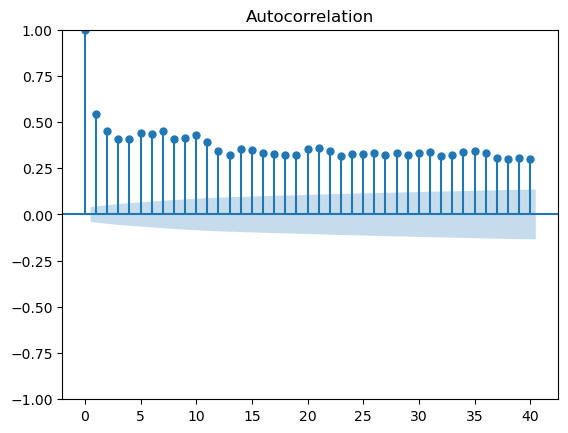

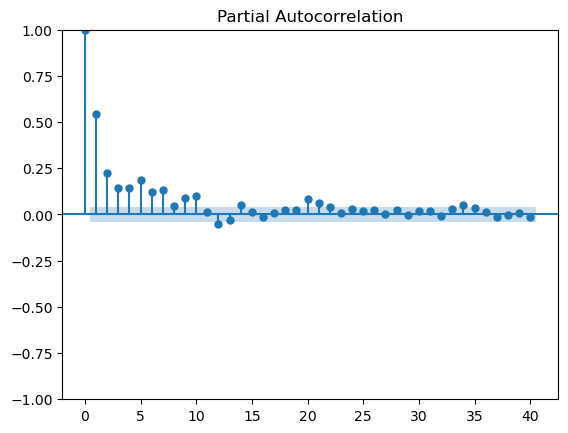

In [8]:
# Look at Autocorrelation Plots
sm.graphics.tsa.plot_acf(sales['qty'], lags=40)
plt.show()

# PACF
sm.graphics.tsa.plot_pacf(sales['qty'], lags=40)
plt.show()